In [ ]:
!git clone https://github.com/PauliusMilmantas/ProteinFolding.git

In [ ]:
!pip install biopython

# Calculate conservatism

Trim sequences to have the same length.

In [16]:
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment

a3m_file = "/content/ProteinFolding/TestCases/test_fb11d.a3m"

# Initialize an empty list to store SeqRecord objects
seq_records = []

# Read the A3M file line by line and create SeqRecord objects
with open(a3m_file, "r") as f:
    sequence = ""
    for line in f:
        line = line.strip()
        if line.startswith(">"):
            # Start a new sequence record
            if sequence:
                seq = Seq(sequence)
                seq_record = SeqRecord(seq)
                seq_records.append(seq_record)
            sequence = ""
        else:
            # Append the sequence line to the current sequence
            sequence += line

# Add the last sequence
if sequence:
    seq = Seq(sequence)
    seq_record = SeqRecord(seq)
    seq_records.append(seq_record)


minLength = 1000
for record in seq_records:
  if len(record.seq) < minLength:
    minLength = len(record.seq)

for record in seq_records:
  record.seq = record.seq[:minLength]

# Create a MultipleSeqAlignment object from the SeqRecord objects
alignment = MultipleSeqAlignment(seq_records)

# Now, 'alignment' contains the MSA with variable-length sequences.

# You can proceed to calculate conservation scores as shown in the previous examples.


Calculate conservatism for each column

In [14]:
from collections import Counter

def calculate_conservation_score(column):
    # Calculate a simple conservation score based on the most frequent amino acid
    aa_counts = Counter(column)
    max_count = max(aa_counts.values())
    total_count = len(column)
    conservation_score = max_count / total_count
    return conservation_score

# Step 2: Calculate the conservation score for each position in the MSA
def calculate_conservation(msa):
    conservation_scores = []

    # Iterate over each position in the alignment
    for i in range(msa.get_alignment_length()):
        column = msa[:, i]  # Get the column (amino acids) at position i
        conservation_score = calculate_conservation_score(column)
        conservation_scores.append(conservation_score)

    return conservation_scores

# Calculate conservation scores for the MSA
conservation_scores = calculate_conservation(alignment)

# Now, 'conservation_scores' contains the conservation scores for each position in the MSA.

# You can use these scores for further analysis or visualization.

# For example, you can print the conservation scores for each position:
for i, score in enumerate(conservation_scores):
    print(f"Position {i+1}: {score}")

Position 1: 0.8660714285714286
Position 2: 0.2857142857142857
Position 3: 0.39285714285714285
Position 4: 0.22321428571428573
Position 5: 0.48214285714285715
Position 6: 0.15178571428571427
Position 7: 0.30357142857142855
Position 8: 0.26785714285714285
Position 9: 0.4375
Position 10: 0.7321428571428571
Position 11: 0.5803571428571429
Position 12: 0.32142857142857145
Position 13: 0.15178571428571427
Position 14: 0.5267857142857143
Position 15: 0.5267857142857143


# Visualize

In [20]:
!pip install matplotlib

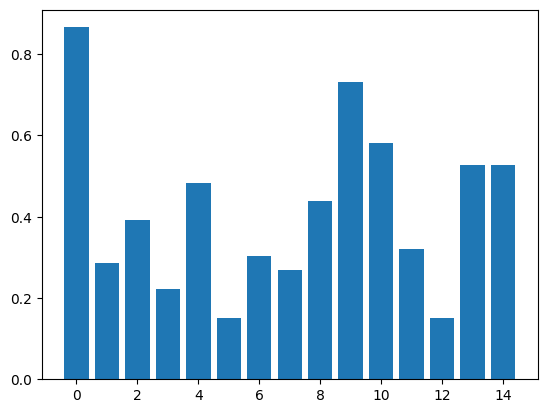

In [29]:
import numpy as np
import matplotlib.pyplot as plt

plt.bar(np.arange(0, len(conservation_scores)), conservation_scores)
plt.show()